# **Import Necessary Packages**

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv('otomoto_price_prediction_data.csv')  #Importing the CSV file.

In [ ]:
df

,make,model,vehicle_year,mileage,engine_capacity,engine_power,gearbox,fuel_type,damaged,is_business,target_price
0,audi,a6,2013,153817.0,1984.0,180.0,automatic,petrol,0,0,69900.0
1,skoda,fabia,2004,115000.0,1390.0,75.0,manual,petrol,0,1,8299.0
2,chevrolet,camaro,2012,299000.0,3600.0,323.0,automatic,petrol,0,1,54500.0
3,bmw,seria-3,2013,155000.0,1995.0,163.0,automatic,diesel,0,0,62000.0
4,renault,talisman,2017,167000.0,1600.0,130.0,automatic,diesel,0,1,52999.0
...,...,...,...,...,...,...,...,...,...,...,...
206202,mercedes-benz,klasa-b,2018,18000.0,1991.0,211.0,automatic,petrol,0,1,89900.0
206203,honda,jazz,2020,2700.0,1498.0,97.0,automatic,hybrid,0,1,94900.0
206204,mitsubishi,l200,2015,225000.0,2477.0,178.0,manual,diesel,0,1,69900.0
206205,volkswagen,transporter,2006,232000.0,1900.0,105.0,manual,diesel,0,0,29900.0


# **Basic Pre-Processing**

In [ ]:
df['fuel_type'].unique()  #Check for various fuel types.

array(['petrol', 'diesel', 'petrol-lpg', 'hybrid', 'petrol-cng',
       'electric', 'etanol'], dtype=object)

In [ ]:
#Check for various gearbox types and replace them with machine readable form.

df['gearbox'] = df['gearbox'].replace(['automatic','manual','cvt','dual-clutch','automatic-stepless','semi-automatic','automated-manual','automatic-sequential','automatic-stepless-sequential','manual-sequential'],[0,1,2,3,4,5,6,7,8,9]) # Label encode the gearbox column. 0: Automatic, 1: Manual

In [ ]:
df['fuel_type'] = df['fuel_type'].replace(['petrol','diesel','petrol-lpg','hybrid','petrol-cng','electric','etanol'],[0,1,2,3,4,5,6])

In [ ]:
df

,make,model,vehicle_year,mileage,engine_capacity,engine_power,gearbox,fuel_type,damaged,is_business,target_price
0,audi,a6,2013,153817.0,1984.0,180.0,0.0,0,0,0,69900.0
1,skoda,fabia,2004,115000.0,1390.0,75.0,1.0,0,0,1,8299.0
2,chevrolet,camaro,2012,299000.0,3600.0,323.0,0.0,0,0,1,54500.0
3,bmw,seria-3,2013,155000.0,1995.0,163.0,0.0,1,0,0,62000.0
4,renault,talisman,2017,167000.0,1600.0,130.0,0.0,1,0,1,52999.0
...,...,...,...,...,...,...,...,...,...,...,...
206202,mercedes-benz,klasa-b,2018,18000.0,1991.0,211.0,0.0,0,0,1,89900.0
206203,honda,jazz,2020,2700.0,1498.0,97.0,0.0,3,0,1,94900.0
206204,mitsubishi,l200,2015,225000.0,2477.0,178.0,1.0,1,0,1,69900.0
206205,volkswagen,transporter,2006,232000.0,1900.0,105.0,1.0,1,0,0,29900.0


In [ ]:
df.isna().sum()  #Total number of missing values across each column.

percent_missing = df.isnull().sum() * 100 / len(df) #Total percentage of missing values.
percent_missing  #Since very less amount of data is missing across the whole dataframe, we can afford to drop them.

make               0.000000
model              0.000000
vehicle_year       0.000000
mileage            0.656622
engine_capacity    1.056220
engine_power       0.765735
gearbox            0.661956
fuel_type          0.000000
damaged            0.000000
is_business        0.000000
target_price       0.000000
dtype: float64

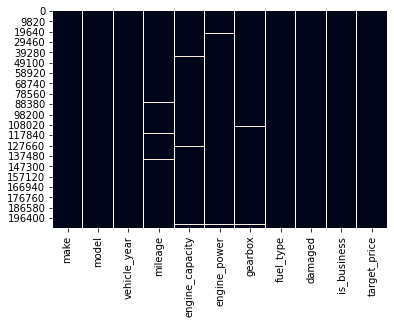

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

#This graphs helps us to visualize the locations of the various missing va values across all the columns. As we can probably see mileage has all the missing values in the middle of the column whereas engine_capacity,engine_power have na values spread across the respective columns. 

In [ ]:
#Alternate method.

#Fill the na values

df_mean = df['mileage'].fillna(df['mileage'].mean()) #filling in the mileage with average values
df_engine_capacity = df['engine_capacity'].fillna(df['engine_capacity'].mean()) #filling in the engine capacity with average values
df_engine_power = df['engine_power'].fillna(df['engine_power'].mean()) #filling in the engine power with average values
df_gearbox = df['gearbox'].fillna(df['gearbox'].mode()) #filling in the gearbox with most occuring value

In [ ]:
df2_na_removed = df.dropna(axis='rows') #Dropping the na values altogether

In [ ]:
df2_na_removed.isna().sum()

make               0
model              0
vehicle_year       0
mileage            0
engine_capacity    0
engine_power       0
gearbox            0
fuel_type          0
damaged            0
is_business        0
target_price       0
dtype: int64

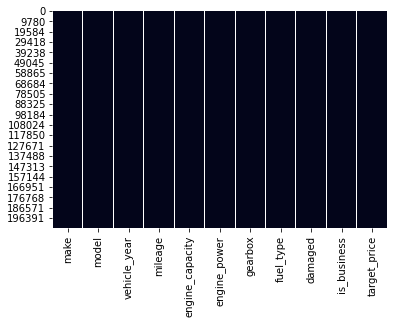

In [ ]:
sns.heatmap(df2_na_removed.isnull(), cbar=False)

#No missing values

In [ ]:
df2_na_removed

,make,model,vehicle_year,mileage,engine_capacity,engine_power,gearbox,fuel_type,damaged,is_business,target_price
0,audi,a6,2013,153817.0,1984.0,180.0,0.0,0,0,0,69900.0
1,skoda,fabia,2004,115000.0,1390.0,75.0,1.0,0,0,1,8299.0
2,chevrolet,camaro,2012,299000.0,3600.0,323.0,0.0,0,0,1,54500.0
3,bmw,seria-3,2013,155000.0,1995.0,163.0,0.0,1,0,0,62000.0
4,renault,talisman,2017,167000.0,1600.0,130.0,0.0,1,0,1,52999.0
...,...,...,...,...,...,...,...,...,...,...,...
206202,mercedes-benz,klasa-b,2018,18000.0,1991.0,211.0,0.0,0,0,1,89900.0
206203,honda,jazz,2020,2700.0,1498.0,97.0,0.0,3,0,1,94900.0
206204,mitsubishi,l200,2015,225000.0,2477.0,178.0,1.0,1,0,1,69900.0
206205,volkswagen,transporter,2006,232000.0,1900.0,105.0,1.0,1,0,0,29900.0


In [ ]:
df2_na_removed['gearbox'].dtype

dtype('float64')

In [ ]:
df2_na_removed['gearbox'] = df2_na_removed['gearbox'].astype(np.int64)  #Convert Gearbox column into int64 datatype.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2_na_removed['gearbox'].dtype

df2_na_removed['gearbox'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
make = df2_na_removed['make'].nunique()
print(make)

model = df2_na_removed['model'].nunique()
print(model)

#Due to high number of unrelated distinct values, we cannot take into consideration the first 2 values while performing a modelling procedure, although it should play a big part and as such create a tier of a group of cars with high to low brand value, same with model too

106
1146


# **Exploratory Data Analysis**

Text(0.5, 0, 'Damaged')

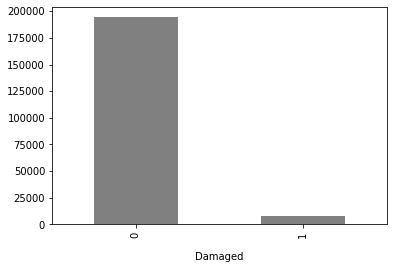

In [ ]:
df2_na_removed['damaged'].value_counts().plot(kind='bar',color ='grey')  #1: Vehicle is damaged ; 2: Vehicle is not damaged
plt.xlabel("Damaged", labelpad=14)

Text(0.5, 0, 'is_business')

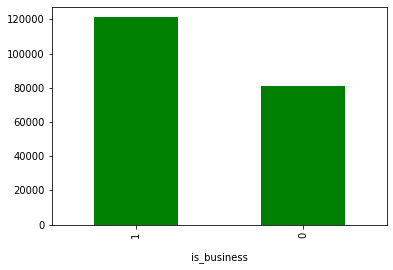

In [ ]:
df2_na_removed['is_business'].value_counts().plot(kind='bar',color ='green')  #1:Business; 2: Individual
plt.xlabel("is_business", labelpad=14)

Text(0.5, 0, 'model')

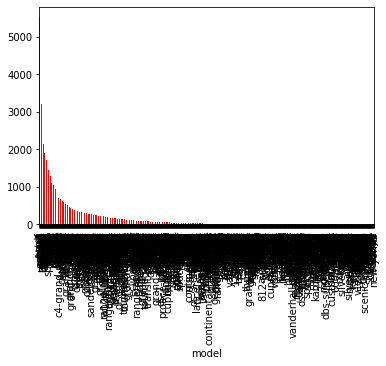

In [ ]:
#Highly imbalanced, if a few models would have been there, we could have label encoded this column.


df2_na_removed['model'].value_counts().plot(kind='bar',color ='red') 
plt.xlabel("model")

Text(0.5, 0, 'make')

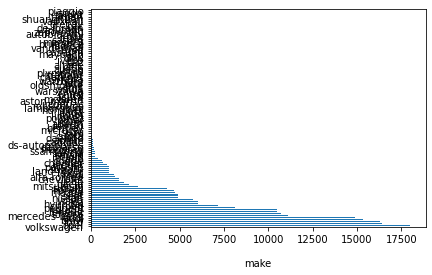

In [ ]:
#Highly imbalanced, if a few manufacturers would have been there, we could have label encoded this column.

df2_na_removed['make'].value_counts().plot(kind='barh')  
plt.xlabel("make", labelpad=14)

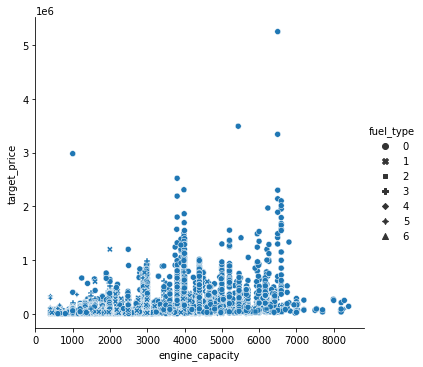

In [ ]:
#f, ax = plt.subplots(figsize = (8,4))
sns.relplot(x = 'engine_capacity', y = 'target_price', data = df2_na_removed,style = df2_na_removed['fuel_type'])

#As we can see from here the target price is high when it comes for cars with fuel type as Petrol. We will dwelve further into this.

Text(0.5, 1.0, 'Fuel Type')

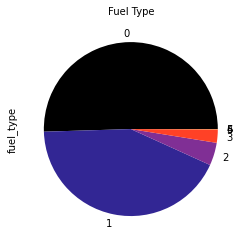

In [ ]:
pd.value_counts(df2_na_removed['fuel_type']).plot(kind ='pie',colormap='CMRmap')
plt.title('Fuel Type', fontsize=10)

#Our hypothesis was right indeed. The fuel type Petrol has the highest number of row entries followed by diesel and very low percentage comprised of all other columns.

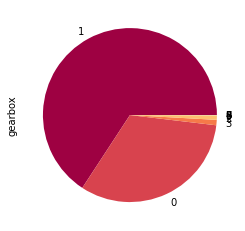

In [ ]:
pd.value_counts(df2_na_removed['gearbox']).plot(kind ='pie',colormap='Spectral')

#It is evident from here that Manual transmission vehicles are much more prevalent with count above 120000 and automatic coming second with just above 60000 vechicles. 

In [ ]:
df2_na_removed.corr(method ='pearson')

,vehicle_year,mileage,engine_capacity,engine_power,gearbox,fuel_type,damaged,is_business,target_price
vehicle_year,1.000000,0.000857,-0.149642,0.163234,-0.134219,0.025246,0.025474,0.324832,0.447010
mileage,0.000857,1.000000,0.003315,0.004175,-0.002544,-0.001409,0.010902,0.001983,-0.000753
engine_capacity,-0.149642,0.003315,1.000000,0.811218,-0.383329,0.107247,0.029805,-0.116016,0.380108
engine_power,0.163234,0.004175,0.811218,1.000000,-0.444755,-0.008992,0.028639,-0.007359,0.647038
gearbox,-0.134219,-0.002544,-0.383329,-0.444755,1.000000,-0.045622,-0.045728,0.026076,-0.299916
fuel_type,0.025246,-0.001409,0.107247,-0.008992,-0.045622,1.000000,0.003039,-0.050520,0.012175
damaged,0.025474,0.010902,0.029805,0.028639,-0.045728,0.003039,1.000000,-0.005977,-0.068611
is_business,0.324832,0.001983,-0.116016,-0.007359,0.026076,-0.050520,-0.005977,1.000000,0.216845
target_price,0.447010,-0.000753,0.380108,0.647038,-0.299916,0.012175,-0.068611,0.216845,1.000000


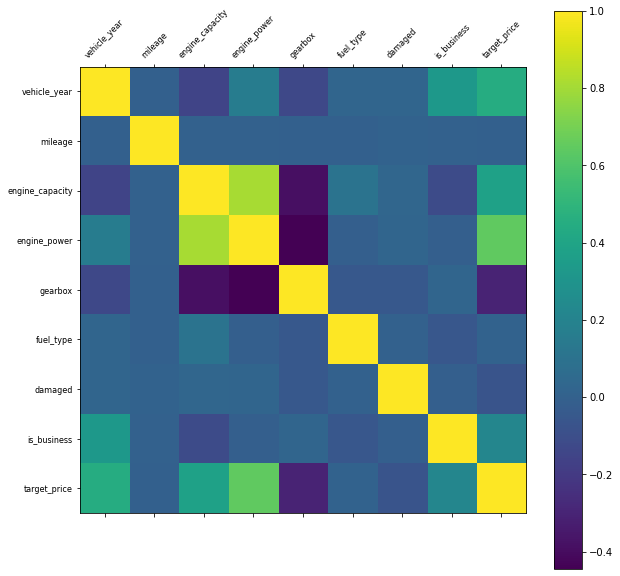

In [ ]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df2_na_removed.corr(method='pearson'), fignum=f.number)
plt.xticks(range(df2_na_removed.select_dtypes(['number']).shape[1]), df2_na_removed.select_dtypes(['number']).columns, fontsize=8, rotation=45)
plt.yticks(range(df2_na_removed.select_dtypes(['number']).shape[1]), df2_na_removed.select_dtypes(['number']).columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
#plt.title('Correlation Matrix', fontsize=10)


#Although there is not that high a correlation but as can be seen Engine power is correlated engine capacity with a value of 0.8

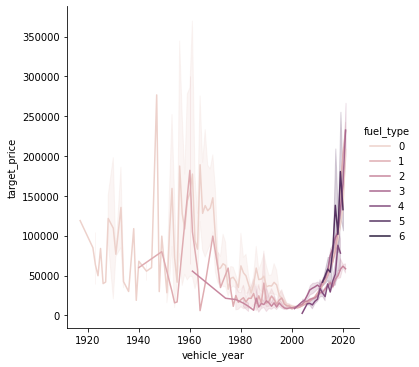

In [ ]:
sns.relplot(x = 'vehicle_year', y = 'target_price',kind = 'line',hue = 'fuel_type', data = df2_na_removed)

#As deduced, we can see that the car price for fuel type as petrol rose to the maximum during the year 1960 whereas the newer fuel types have the maximum value as around 200000 to 250000 during the year 2002 to 2020.But still the older fuel types were much more in demand.

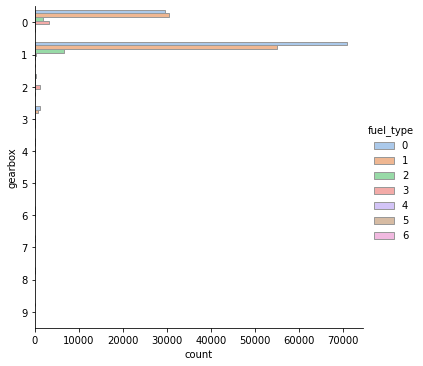

In [ ]:
sns.catplot(y="gearbox", hue="fuel_type", kind="count",
            palette="pastel", edgecolor=".6",
            data=df2_na_removed)

In [ ]:
print(df2_na_removed['vehicle_year'].min())

print(df2_na_removed['vehicle_year'].max())

1917
2021


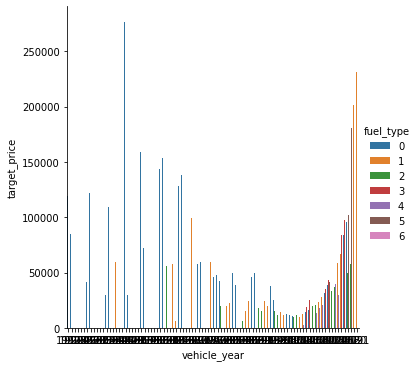

In [ ]:
sns.catplot(x='vehicle_year',
            y ='target_price',
                hue='fuel_type',
                data=df2_na_removed,
                kind='bar',
                ci=None,
                   )

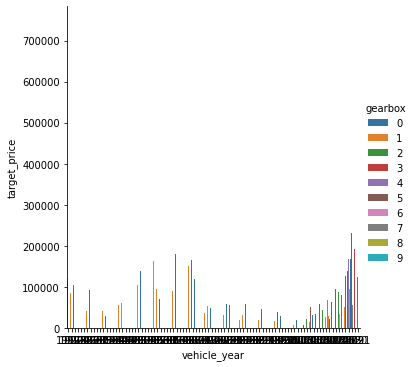

In [ ]:
sns.catplot(x='vehicle_year',
            y ='target_price',
                hue='gearbox',
                data=df2_na_removed,
                kind='bar',
                ci=None,
                   )

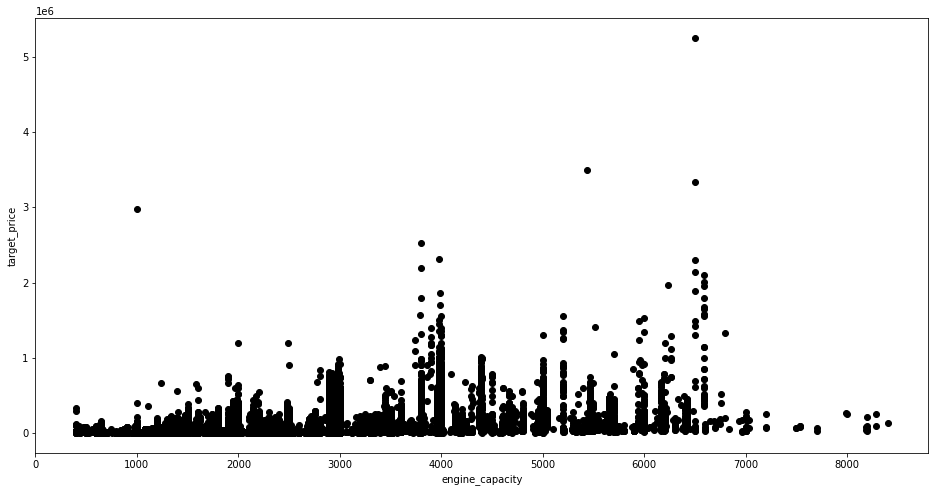

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df2_na_removed['engine_capacity'], df2_na_removed['target_price'], c = "black")
ax.set_xlabel('engine_capacity')
ax.set_ylabel('target_price')
plt.show()

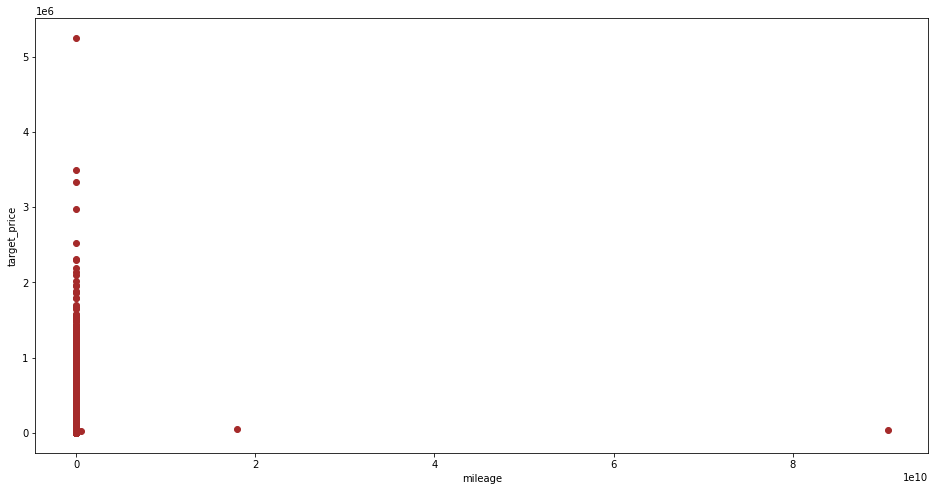

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df2_na_removed['mileage'], df2_na_removed['target_price'],c='brown')
ax.set_xlabel('mileage')
ax.set_ylabel('target_price')
plt.show()

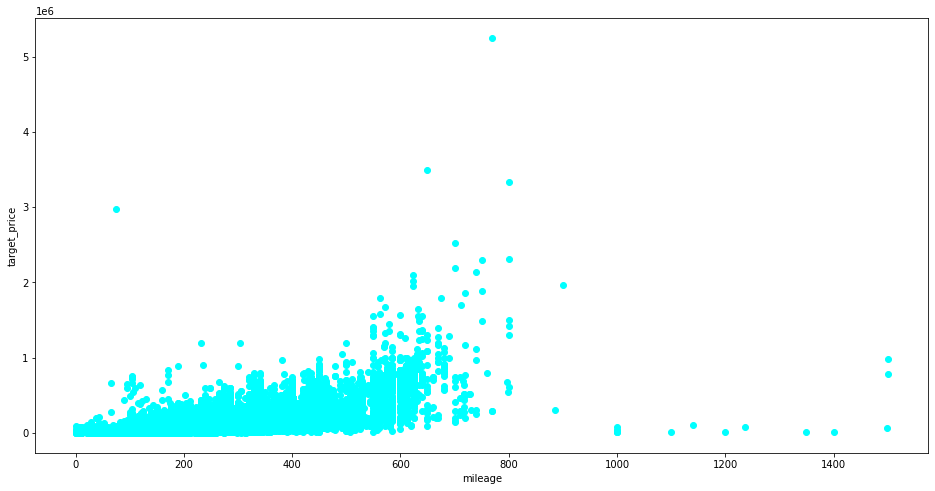

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df2_na_removed['engine_power'], df2_na_removed['target_price'], c = 'cyan')
ax.set_xlabel('mileage')
ax.set_ylabel('target_price')
plt.show()

# **Detection and Treating Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


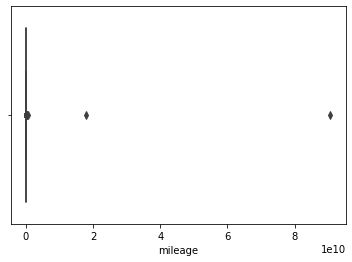

In [ ]:
import seaborn as sns
sns.boxplot(df2_na_removed['mileage'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


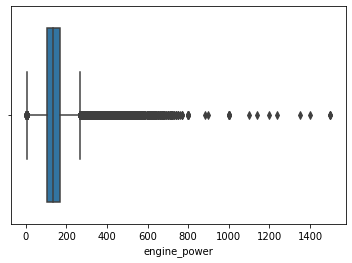

In [ ]:
sns.boxplot(df2_na_removed['engine_power'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


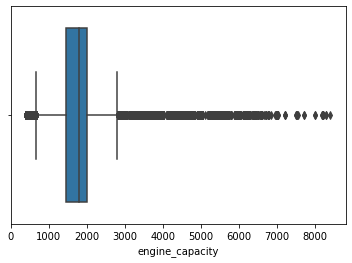

In [ ]:
sns.boxplot(df2_na_removed['engine_capacity'])

In [ ]:
q_low_mil = df2_na_removed["mileage"].quantile(0.01)
q_hi_mil = df2_na_removed["mileage"].quantile(0.99)

df2_na_removed= df2_na_removed[(df2_na_removed["mileage"] < q_hi_mil) & (df2_na_removed["mileage"] > q_low_mil)]

#print(df2_na_removed['mileage'].quantile(0.50)) 
#print(df2_na_removed['mileage'].quantile(0.95))

In [ ]:
#df2_na_removed['mileage'] = np.where(df2_na_removed['mileage'] > 287000, 137800, df2_na_removed['mileage'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


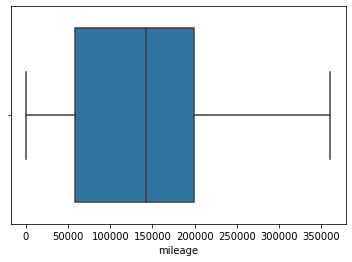

In [ ]:
sns.boxplot(df2_na_removed['mileage'])

In [ ]:
#Since Engine power and Engine capacity are correlated to each other with a value of 0.8, It makes sense to remove one of them, as such, we will remove engine capacity since it has high values.

df2_na_removed = df2_na_removed.drop(['engine_capacity'], axis=1)

In [ ]:
#print(df2_na_removed['engine_power'].quantile(0.50)) 
#print(df2_na_removed['engine_power'].quantile(0.95))

In [ ]:
#df2_na_removed['engine_power'] = np.where(df2_na_removed['engine_power'] > 300, 136, df2_na_removed['engine_power'])

In [ ]:
q_low_po = df2_na_removed["engine_power"].quantile(0.15)
q_hi_po  = df2_na_removed["engine_power"].quantile(0.85)

df2_na_removed= df2_na_removed[(df2_na_removed["engine_power"] < q_hi_po) & (df2_na_removed["engine_power"] > q_low_po)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


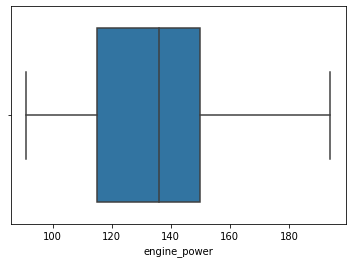

In [ ]:
sns.boxplot(df2_na_removed['engine_power'])

In [ ]:
df2_na_removed

,make,model,vehicle_year,mileage,engine_power,gearbox,fuel_type,damaged,is_business,target_price
0,audi,a6,2013,153817.0,180.0,0,0,0,0,69900.0
3,bmw,seria-3,2013,155000.0,163.0,0,1,0,0,62000.0
4,renault,talisman,2017,167000.0,130.0,0,1,0,1,52999.0
5,volkswagen,tiguan,2018,26181.0,150.0,0,0,0,1,105900.0
7,skoda,octavia,2017,184000.0,150.0,1,0,0,1,44001.0
...,...,...,...,...,...,...,...,...,...,...
206201,skoda,octavia,2008,250948.0,140.0,1,1,0,0,11500.0
206203,honda,jazz,2020,2700.0,97.0,0,3,0,1,94900.0
206204,mitsubishi,l200,2015,225000.0,178.0,1,1,0,1,69900.0
206205,volkswagen,transporter,2006,232000.0,105.0,1,1,0,0,29900.0


In [ ]:
X =df2_na_removed.drop(['target_price','make','model'],axis = 1)
y =df2_na_removed[['target_price']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

# **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()
scaled_features_train = X_train.copy()
scaled_features_test = X_test.copy()

col_names = ['mileage', 'engine_power']
features_train = scaled_features_train[col_names]
features_test = scaled_features_test[col_names]
scaler = sc.fit(features_train.values)
features = scaler.transform(features_test.values)
scaler_train = scaler.transform(features_train.values)

scaled_features_train[col_names] = scaler_train
scaled_features_test[col_names] = features


sc2 = StandardScaler()
scaler_test= sc2.fit(y_train)
y_scaled_test = scaler_test.transform(y_test)
y_scaled_train=scaler_test.transform(y_train)

In [ ]:
scaled_features_train

,vehicle_year,mileage,engine_power,gearbox,fuel_type,damaged,is_business
28252,2007,0.091472,0.151768,0,1,0,0
143661,2016,-0.322630,2.033159,0,1,0,0
183033,2008,0.326503,0.227024,1,0,0,0
145847,2012,-0.526323,-1.353344,1,0,0,1
52937,2017,-0.640033,-0.412649,1,0,0,1
...,...,...,...,...,...,...,...
64633,2007,1.274247,-0.224510,1,1,0,0
151189,2020,-1.576071,1.732136,1,0,0,1
148532,2014,-0.694739,-0.036371,1,0,0,1
182762,2007,-0.585640,-1.541483,1,0,0,1


In [ ]:
scaled_features_test

,vehicle_year,mileage,engine_power,gearbox,fuel_type,damaged,is_business
189581,2007,0.193475,-0.788927,1,1,0,0
90606,2005,0.839093,0.528047,1,0,0,1
45741,2019,-1.487711,2.033159,0,0,0,1
202721,2008,0.102664,-1.654366,1,0,0,1
93899,2015,-0.109983,1.017208,0,1,0,1
...,...,...,...,...,...,...,...
174351,2014,-0.479317,1.807392,0,1,0,0
70873,2016,0.326503,1.092464,1,0,0,1
61920,2016,-0.465047,1.807392,0,0,0,0
92620,2017,-1.262753,-0.224510,1,1,0,1


# **K-Fold Cross Validation**

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=42, shuffle=False)

best_svr.fit(scaled_features_train, y_scaled_train)
scores.append(best_svr.score(scaled_features_test, y_scaled_test))


#cross_val_score(best_svr, X, y, cv=10)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
scores

[0.38661647861307313]

# **Support Vector Regression**

In [ ]:
import timeit

start_svr = timeit.default_timer()

from sklearn.svm import SVR

regressor = SVR(kernel='rbf',C = 1)
regressor.fit(scaled_features_train,y_scaled_train)

stop_svr = timeit.default_timer()

print('Time: ', stop_svr - start_svr)  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Time:  1328.9466214619997


In [ ]:
y_pred =regressor.predict(scaled_features_test)

In [ ]:
y_pred

array([-0.64192036, -0.77521524,  0.39508261, ...,  0.13369092,
        0.17739124, -0.56608719])

In [ ]:
y_predicted = sc2.inverse_transform(y_pred)

In [ ]:
y_predicted

array([20791.36858067, 15233.53737258, 64029.9919747 , ...,
       53131.06751938, 54953.18532698, 23953.28970415])

In [ ]:
y_test

,target_price
189581,9999.0
90606,24500.0
45741,180000.0
202721,11700.0
93899,48800.0
...,...
174351,75900.0
70873,45999.0
61920,105900.0
92620,68880.0


In [ ]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_predicted)

0.38661647861307324

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_scaled_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_scaled_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_scaled_test, y_pred)))

Mean Absolute Error: 0.4217968622370053
Mean Squared Error: 0.6110805059067631
Root Mean Squared Error: 0.7817163845710048


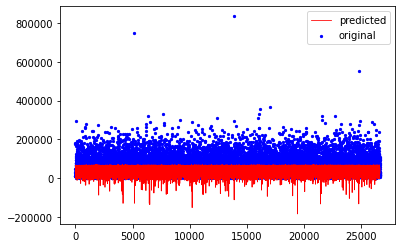

In [ ]:
x_ax = range(len(y_predicted))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_predicted, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

# **Custom CNN Model**

In [ ]:
scaled_features_train = scaled_features_train.values.reshape(scaled_features_train.shape[0], scaled_features_train.shape[1], 1)
print(scaled_features_train.shape)

(106456, 7, 1)


In [ ]:
scaled_features_test = scaled_features_test.values.reshape(scaled_features_test.shape[0], scaled_features_test.shape[1], 1)
print(scaled_features_test.shape)

(26614, 7, 1)


In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(32, 2, activation="relu", input_shape=(7, 1)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(1))
model.compile(loss="mse", optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 32)             96        
_________________________________________________________________
flatten (Flatten)            (None, 192)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                12352     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 12,513
Trainable params: 12,513
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [ ]:
import timeit
start_cnn = timeit.default_timer()

model.fit(scaled_features_train, y_scaled_train, batch_size=100,epochs=50, verbose=0)

stop_cnn = timeit.default_timer()

print('Time: ', stop_cnn - start_cnn)  

Time:  108.00704970599963


In [ ]:
y_cnn_norm = model.predict(scaled_features_test)

In [ ]:
y_cnn_pred = sc2.inverse_transform(model.predict(scaled_features_test))

In [ ]:
y_cnn_pred

array([[ 29226.734],
       [ 24393.955],
       [155398.48 ],
       ...,
       [ 65963.26 ],
       [ 79512.37 ],
       [ 20108.918]], dtype=float32)

In [ ]:
y_test

,target_price
189581,9999.0
90606,24500.0
45741,180000.0
202721,11700.0
93899,48800.0
...,...
174351,75900.0
70873,45999.0
61920,105900.0
92620,68880.0


In [ ]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_cnn_pred)

0.802681308353344

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_scaled_test, y_cnn_norm))
print('Mean Squared Error:', metrics.mean_squared_error(y_scaled_test, y_cnn_norm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_scaled_test, y_cnn_norm)))

Mean Absolute Error: 0.2872227704747899
Mean Squared Error: 0.1965778377651768
Root Mean Squared Error: 0.4433709933736947


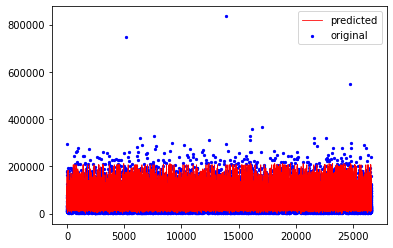

In [ ]:
x_ax = range(len(y_cnn_pred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_cnn_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

# **Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

P_reg = PolynomialFeatures(degree = 4)

In [ ]:
nsamples, nx, ny = scaled_features_train.shape
d2_train_dataset = scaled_features_train.reshape((nsamples,nx*ny))

In [ ]:
nsamples, nx, ny = scaled_features_test.shape
d2_test_dataset = scaled_features_test.reshape((nsamples,nx*ny))

In [ ]:
X_P = P_reg.fit(d2_train_dataset)
X_Poly_train = X_P.transform(d2_train_dataset)
X_Poly_test = X_P.transform(d2_test_dataset)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
start_poly = timeit.default_timer()

L_reg2 = LinearRegression()
L_reg2.fit(X_Poly_train,y_scaled_train)

stop_poly = timeit.default_timer()

print('Time: ', stop_poly - start_poly) 


Time:  2.6919993049996265


In [ ]:
poly_pred = L_reg2.predict(X_Poly_test)

In [ ]:
poly_predicted = sc2.inverse_transform(poly_pred)

In [ ]:
y_test

,target_price
189581,9999.0
90606,24500.0
45741,180000.0
202721,11700.0
93899,48800.0
...,...
174351,75900.0
70873,45999.0
61920,105900.0
92620,68880.0


In [ ]:
poly_predicted

array([[ 15929.19027492],
       [ 15619.68071481],
       [147377.91889726],
       ...,
       [ 71785.19809791],
       [ 75453.93615951],
       [ 16933.535588  ]])

In [ ]:
r2_score(y_test, poly_predicted)

0.8665414415357509

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_scaled_test, poly_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_scaled_test, poly_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_scaled_test, poly_pred)))

Mean Absolute Error: 0.2121040243235336
Mean Squared Error: 0.1329574737181045
Root Mean Squared Error: 0.36463334147894993


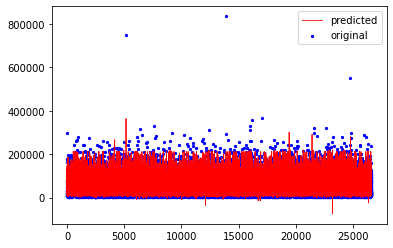

In [ ]:
x_ax = range(len(poly_predicted))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, poly_predicted, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

# **Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_random = RandomForestRegressor(n_estimators = 10,random_state = 0)

In [ ]:
X_random_train = scaled_features_train.reshape(scaled_features_train.shape[0], -1)
X_random_test = scaled_features_test.reshape(scaled_features_test.shape[0], -1)

In [ ]:
import timeit
start_random = timeit.default_timer()

regressor_random.fit(X_random_train,y_scaled_train)

stop_random = timeit.default_timer()

print('Time: ', stop_random - start_random) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Time:  2.164081670000087


In [ ]:
y_random_pred = sc2.inverse_transform(regressor_random.predict(X_random_test))

In [ ]:
y_predictionn = regressor_random.predict(X_random_test)

In [ ]:
y_random_pred

array([ 19310.        ,  14309.9       , 175474.16666667, ...,
        91020.        ,  62889.7       ,  15937.5       ])

In [ ]:
y_test

,target_price
189581,9999.0
90606,24500.0
45741,180000.0
202721,11700.0
93899,48800.0
...,...
174351,75900.0
70873,45999.0
61920,105900.0
92620,68880.0


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_random_pred)

0.873760911748056

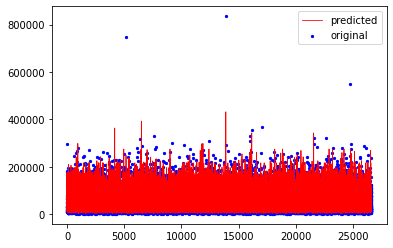

In [ ]:
x_ax = range(len(y_random_pred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_random_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_scaled_test, y_predictionn))
print('Mean Squared Error:', metrics.mean_squared_error(y_scaled_test, y_predictionn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_scaled_test, y_predictionn)))

Mean Absolute Error: 0.20054139765332255
Mean Squared Error: 0.12576510979587366
Root Mean Squared Error: 0.3546337685498572


# **XG Boost Regressor**

In [ ]:
import xgboost as xg

In [ ]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 100, seed = 123)

In [ ]:
import timeit
start_random = timeit.default_timer()


xgb_r.fit(scaled_features_train,y_scaled_train)

stop_random = timeit.default_timer()

print('Time: ', stop_random - start_random) 

[18:29:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time:  4.625678646999972


In [ ]:
y_xg = xgb_r.predict(scaled_features_test)

In [ ]:
pred = sc2.inverse_transform(xgb_r.predict(scaled_features_test))

In [ ]:
y_test

,target_price
189581,9999.0
90606,24500.0
45741,180000.0
202721,11700.0
93899,48800.0
...,...
174351,75900.0
70873,45999.0
61920,105900.0
92620,68880.0


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.8745946854571528

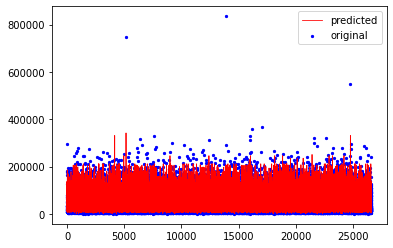

In [ ]:
x_ax = range(len(pred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax,pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_scaled_test, y_xg))
print('Mean Squared Error:', metrics.mean_squared_error(y_scaled_test, y_xg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_scaled_test, y_xg)))

Mean Absolute Error: 0.20679283159444645
Mean Squared Error: 0.12493446650919567
Root Mean Squared Error: 0.35346070009153163


# **Model Performance**

In [ ]:
#Support Vector Regression:- 0.386

#Custom Convolutional Neural Network:-0.802

#Polynomial Regression:-0.866

#Random Forest Regression:-0.873

#XG Boost Regression:- 0.874